# Boston 주택 가격 예측 모델

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = (test_data - mean) / std

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,953
Trainable params: 1,953
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.3, random_state=0)
history = model.fit(x_train, y_train, epochs=50, batch_size=100, validation_data=(x_val, y_val))

Epoch 1/50
3/3 [==============================] - 1s 69ms/step - loss: 598.0118 - mae: 22.7556 - val_loss: 567.2815 - val_mae: 21.8610
Epoch 2/50
3/3 [==============================] - 0s 13ms/step - loss: 589.9444 - mae: 22.5783 - val_loss: 560.1067 - val_mae: 21.6890
Epoch 3/50
3/3 [==============================] - 0s 13ms/step - loss: 582.5797 - mae: 22.4090 - val_loss: 553.2036 - val_mae: 21.5221
Epoch 4/50
3/3 [==============================] - 0s 13ms/step - loss: 575.2788 - mae: 22.2407 - val_loss: 546.4455 - val_mae: 21.3575
Epoch 5/50
3/3 [==============================] - 0s 12ms/step - loss: 567.9787 - mae: 22.0736 - val_loss: 539.6594 - val_mae: 21.1916
Epoch 6/50
3/3 [==============================] - 0s 13ms/step - loss: 560.7835 - mae: 21.9061 - val_loss: 532.7917 - val_mae: 21.0245
Epoch 7/50
3/3 [==============================] - 0s 12ms/step - loss: 553.2667 - mae: 21.7342 - val_loss: 525.7081 - val_mae: 20.8522
Epoch 8/50
3/3 [==============================] - 0s 12

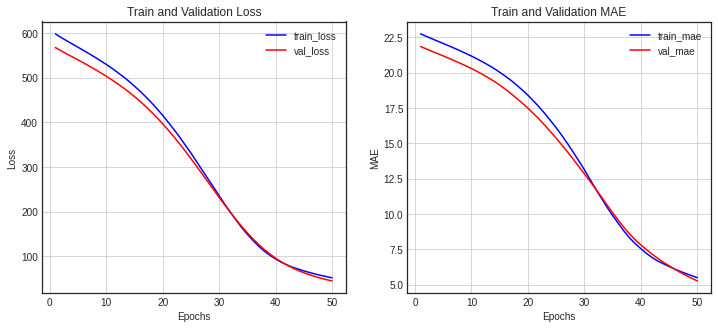

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 56.1373 - mae: 6.0103


[56.13731384277344, 6.010335445404053]

# Reuters 딥러닝 모델

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [9]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.25, random_state=0)
val_data = x_val

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
2246
46


In [10]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  array = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    array[i, d] = 1
  return array

x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(val_data)
test_data = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
test_labels = utils.to_categorical(test_labels)

print(x_train.shape)
print(x_val.shape)
print(test_data.shape)
print(y_train.shape)
print(y_val.shape)
print(test_labels.shape)

(6736, 10000)
(2246, 10000)
(2246, 10000)
(6736, 46)
(2246, 46)
(2246, 46)


In [11]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)              

In [13]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_cb = callbacks.ModelCheckpoint('keras_reuter_model.h5', save_best_only=True)
earlystopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[checkpoint_cb, earlystopping_cb])

Epoch 1/100
211/211 [==============================] - 2s 6ms/step - loss: 1.8927 - accuracy: 0.5714 - val_loss: 1.4546 - val_accuracy: 0.7182
Epoch 2/100
211/211 [==============================] - 1s 5ms/step - loss: 1.2388 - accuracy: 0.7120 - val_loss: 1.1055 - val_accuracy: 0.7694
Epoch 3/100
211/211 [==============================] - 1s 5ms/step - loss: 1.0009 - accuracy: 0.7640 - val_loss: 0.9999 - val_accuracy: 0.7854
Epoch 4/100
211/211 [==============================] - 1s 5ms/step - loss: 0.8468 - accuracy: 0.7942 - val_loss: 0.9518 - val_accuracy: 0.7965
Epoch 5/100
211/211 [==============================] - 1s 5ms/step - loss: 0.7196 - accuracy: 0.8226 - val_loss: 0.9098 - val_accuracy: 0.8121
Epoch 6/100
211/211 [==============================] - 1s 5ms/step - loss: 0.6146 - accuracy: 0.8458 - val_loss: 0.8959 - val_accuracy: 0.8179
Epoch 7/100
211/211 [==============================] - 1s 5ms/step - loss: 0.5553 - accuracy: 0.8616 - val_loss: 0.8779 - val_accuracy: 0.8175

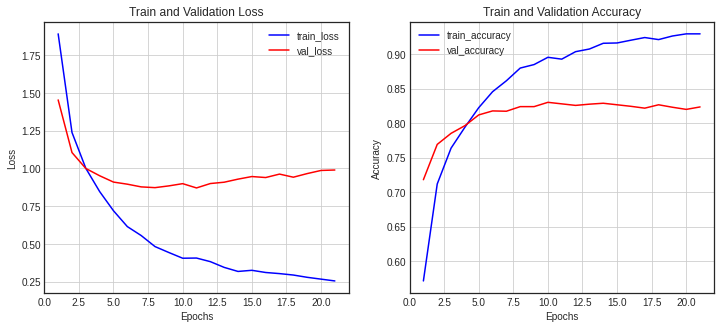

In [14]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [15]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 0.9521 - accuracy: 0.8134


[0.9520902037620544, 0.8134461045265198]

# CIFAR10 딥러닝 모델

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [17]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=0)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [18]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

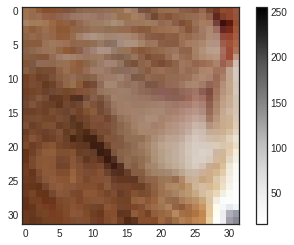

In [19]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [20]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [21]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32*32*3)
x_val = x_val.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [22]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [23]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(2048))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_2 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_3 (Activation)    (None, 1024)             

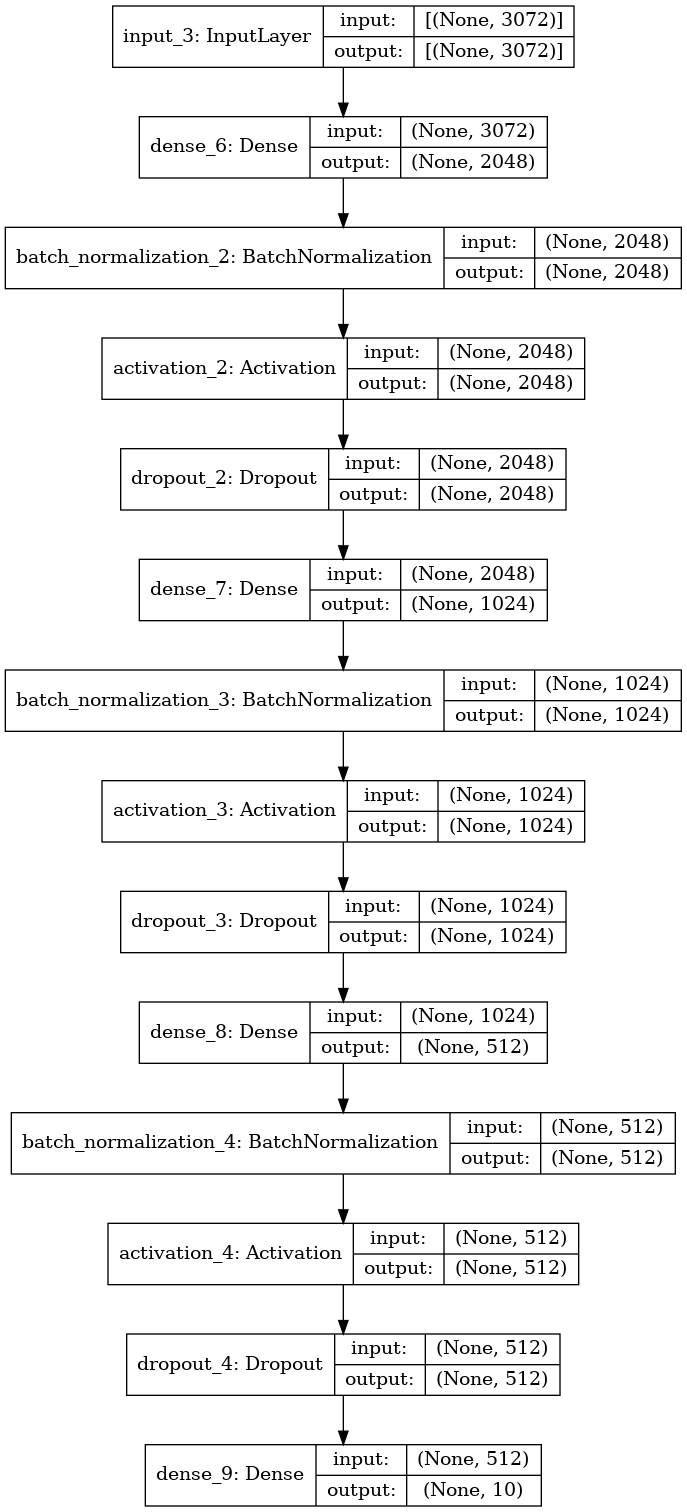

In [25]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

utils.plot_model(model, show_shapes=True)

In [26]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_cb = callbacks.ModelCheckpoint('keras_cifar10_model.h5', save_best_only=True)
earlystopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[checkpoint_cb, earlystopping_cb])

Epoch 1/100
1250/1250 [==============================] - 7s 5ms/step - loss: 1.9654 - accuracy: 0.3167 - val_loss: 1.8767 - val_accuracy: 0.3508
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6725 - accuracy: 0.4037 - val_loss: 1.8549 - val_accuracy: 0.3606
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5875 - accuracy: 0.4363 - val_loss: 1.6265 - val_accuracy: 0.4050
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5436 - accuracy: 0.4481 - val_loss: 1.4885 - val_accuracy: 0.4615
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4959 - accuracy: 0.4650 - val_loss: 1.5439 - val_accuracy: 0.4426
Epoch 6/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4663 - accuracy: 0.4787 - val_loss: 1.4391 - val_accuracy: 0.4833
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4308 - accuracy: 0.4900 - val_loss: 1.6474 - val_ac

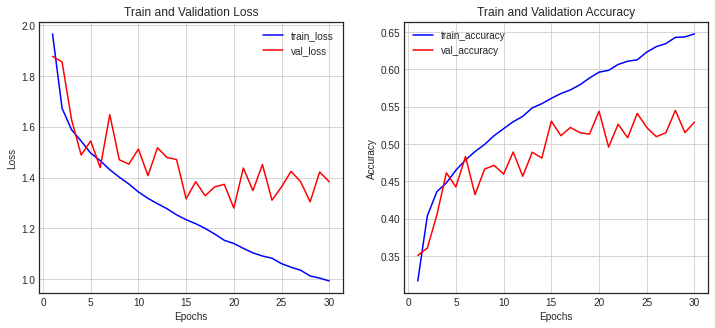

In [27]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(loss)+1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1. set_xlabel('Epochs')
ax1. set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2. plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [28]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2769 - accuracy: 0.5484


[1.2769479751586914, 0.5483999848365784]